# Setup

In [3]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
# from numpy import *
# from matplotlib.pyplot import *
import h5py
from scipy.signal import find_peaks

from slab.datamanagement import SlabFile
from slab.instruments import InstrumentManager
import PNAX_spectroscopy_utils as pnax

%matplotlib notebook

No module named 'visa'
Warning VISA library import failed
Could not load Autonics TM4 Driver


In [4]:
# Connect to instrument

im = InstrumentManager(config_path="C:\_Lib\python\slab\instruments\instruments.cfg")
nwa = im['PNAX']

print(nwa.get_id())

# Path to save data

data_path = "D:\\_data\\20230222_T162_blueforssnowy_coffin cavity test\\data\\"

Loaded Instruments:  !
Keysight Technologies,N5222B,MY61253732,A.15.00.15



# Single Tone Spectroscopy

## Resonator Spectroscopy

In [5]:
config = {
    'instrument':nwa,
    'prefix':'resonator_spec_1avg',
    'read_freq': 7.287E9,
    'span':20E6,
    'read_power' : -40,  # mislabeled, should be probe power
    'sweep_pts':2000,
    'ifbw':100,
    'avgs':1,
    'avgs_state': True,
    'measurement':'S21',
    'elec_delay':7.7E-9,
    'phase_offset':0.0,
    'expt_path':data_path
}

pnax.single_tone_CW(config)

00004_resonator_spec_1avg.h5
Setting up CW parameters
Read Now On
hey
finished downloading
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\data\00004_resonator_spec_1avg.h5


<IPython.core.display.Javascript object>


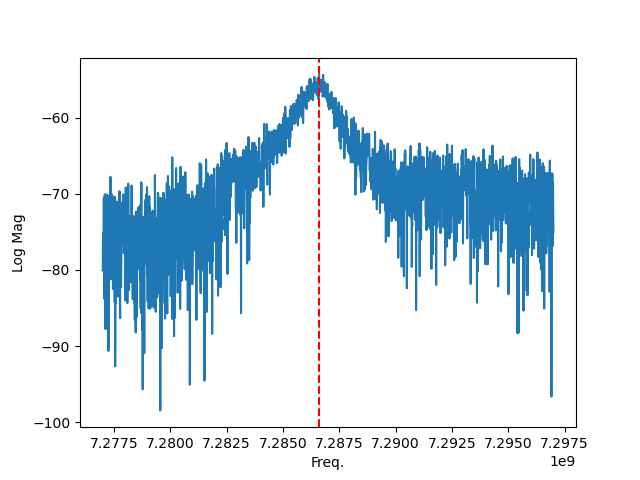

Resonator Frequency: 7286604802.4012


In [7]:
file = h5py.File(data_path + '00003_resonator_spec_1avg.h5' , 'r')

freq = np.array(file['freq'])[0]
log_mag = np.array(file['mags'])[0]
phase = np.array(file['phases'])[0]
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, log_mag)
ax.set_ylabel('Log Mag')
ax.set_xlabel('Freq.')

resonator_freq = freq[np.argmax(log_mag)]
ax.axvline(resonator_freq, linestyle='--', c='r')
print("Resonator Frequency:", resonator_freq)

## Resonator Spectroscopy With Qubit Drive

In [122]:
config = {
    'instrument':nwa,
    'prefix':'resonator_spec_1avg',
    'read_freq': 7.287E9,
    'span':20E6,
    'read_power' : -40,  # mislabeled, should be probe power
    'sweep_pts':2000,
    'ifbw':100,
    'avgs':1,
    'avgs_state': True,
    'measurement':'S21',
    'is_qubitdrive':1,
    'qfreq':4.256e9,
    'elec_delay':7.7E-9,
    'phase_offset':0.0,
    'expt_path':data_path
}

pnax.single_tone_CW(config)

00002_resonator_spec_1avg.h5
Setting up CW parameters
Read Now On
hey
finished downloading
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\data\00002_resonator_spec_1avg.h5


## Resonator Spectroscopy Power Sweep

In [9]:
read_power_list = [-40, -35, -30, -25, -20, -15, -10]

config= {
    'read_power_list': read_power_list,
    'instrument':nwa,
    'prefix':'resonator_spec_power_sweep',
    'read_freq_center': 7.287E9,
    'span':100E6,
    'sweep_pts':2000,
    'ifbw':1000,
    'avgs':20,
    'avgs_state': True,
    'measurement':'S21',
    'elec_delay': 7.7E-9,
    'expt_path': data_path
}

pnax.single_tone_power_sweep(config)

00006_resonator_spec_power_sweep.h5
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading
Setting up CW parameters
Read Now On
Qubit Drive Now Off
finished downloading


<IPython.core.display.Javascript object>


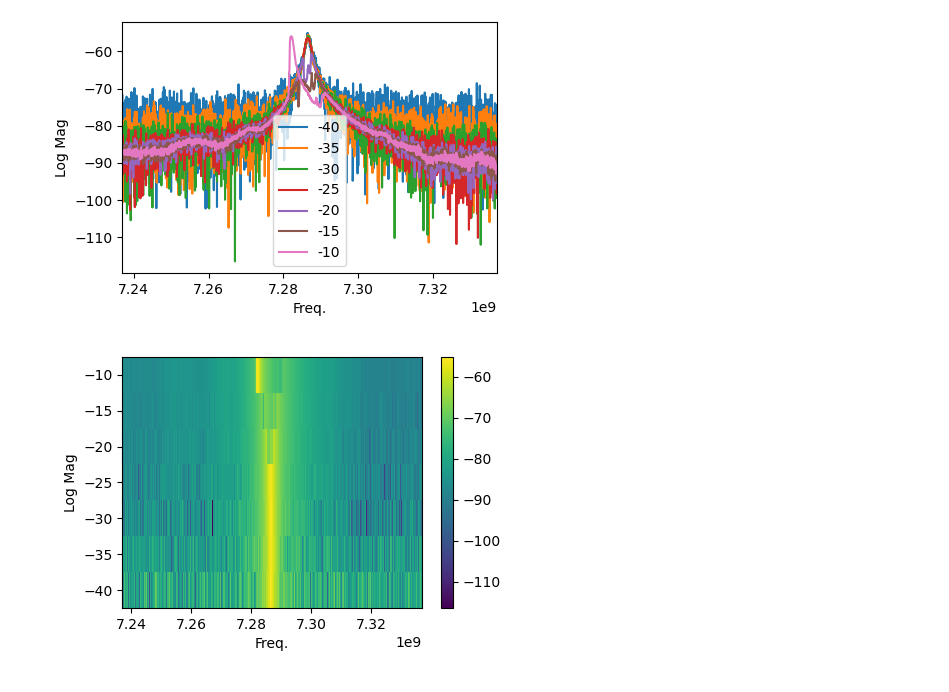

In [44]:
file = h5py.File(data_path + '00006_resonator_spec_power_sweep.h5' , 'r')

freq = np.array(file['freq'])[0]
log_mag = np.array(file['mags'])[0]
phase = np.array(file['phases'])[0]
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(221)
for i in np.arange(len(read_power)):
    ax.plot(freq[i], log_mag[i], label=read_power[i])
ax.set_ylabel('Log Mag')
ax.set_xlabel('Freq.')
ax.legend()

ax2 = fig.add_subplot(223, sharex=ax)
ax2.set_ylabel('Log Mag')
ax2.set_xlabel('Freq.')
ax2_plot = ax2.pcolormesh(freq[0], read_power, log_mag)
fig.colorbar(ax2_plot)

fig.tight_layout()


# Two Tone Spectroscopy

## Qubit Spectroscopy

In [49]:
resonator_freq = 7.287E9
qubit_center = 4.2563E9
qubit_span = 100E6

In [50]:
config = {
    'instrument':nwa,
    'prefix':'qubit_spec_1avg',
    'read_freq': resonator_freq,
    'probe_freq_center': qubit_center,
    'span':qubit_span,
    'read_power' : -35,
    'probe_power': -40,
    'sweep_pts':2000,
    'ifbw':100,
    'avgs':1,
    'avgs_state': True,
    'expt_path':data_path,
    'EF_probe': False
}

pnax.two_tone_CW(config)

00000_qubit_spec_1avg.h5
Setting up pulsed parameters
set read freq
Read Now On
Qubit Drive Now ON
finished downloading at frequency 4.206 GHz


<IPython.core.display.Javascript object>


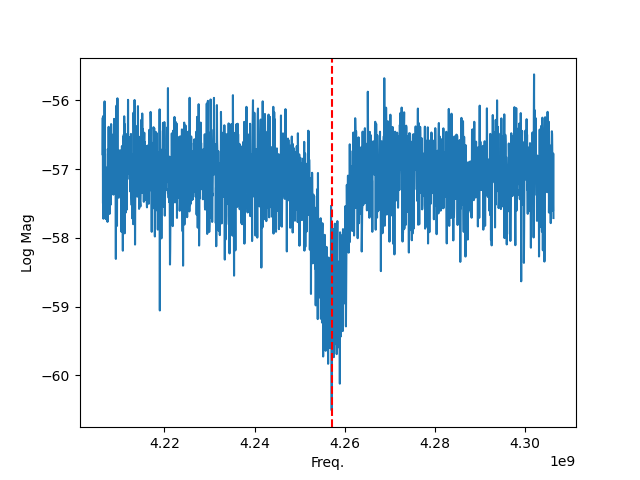

Qubit Frequency: 4257125412.706353


In [96]:
file = h5py.File(data_path + '00000_qubit_spec_1avg.h5' , 'r')

freq = np.array(file['freq'])[0]
log_mag = np.array(file['mags'])[0]
phase = np.array(file['phases'])[0]
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, log_mag)
ax.set_ylabel('Log Mag')
ax.set_xlabel('Freq.')

qubit_freq = freq[np.argmin(log_mag)]
ax.axvline(qubit_freq, linestyle='--', c='r')
print("Qubit Frequency:", qubit_freq)

## Estimate of anharmonicity

- At strong drive strength, a second peak in the qubit appears which corresponds to $\omega_{gf} / 2$
- $\alpha = \omega_{gf} - 2 \omega_{ge}$

In [59]:
config = {
    'instrument':nwa,
    'prefix':'qubit_spec_anharm',
    'read_freq': resonator_freq,
    'probe_freq_center': qubit_center,
    'span':200E6,
    'read_power' : -35,
    'probe_power': -10,
    'sweep_pts':2000,
    'ifbw':100,
    'avgs':10,
    'avgs_state': True,
    'expt_path':data_path,
    'EF_probe': False
}

pnax.two_tone_CW(config)

00002_qubit_spec_anharm.h5
Setting up pulsed parameters
set read freq
Read Now On
Qubit Drive Now ON
finished downloading at frequency 4.156 GHz


<IPython.core.display.Javascript object>


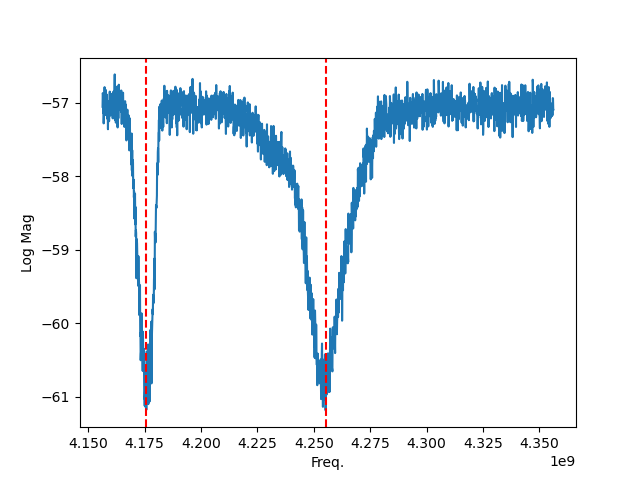

Peaks: [4.17570970e+09 4.25524947e+09]
Estimated anharmonicity: -159079539.76988506


In [93]:
file = h5py.File(data_path + '00002_qubit_spec_anharm.h5' , 'r')

freq = np.array(file['freq'])[0]
log_mag = np.array(file['mags'])[0]
phase = np.array(file['phases'])[0]
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, log_mag)
ax.set_ylabel('Log Mag')
ax.set_xlabel('Freq.')

# Find peaks

peaks, _ = find_peaks(-log_mag, height=60, width=20)
for i in peaks:
    ax.axvline(freq[i], linestyle='--', c='r')
    
print('Peaks:', freq[peaks])
print('Estimated anharmonicity:', 2*(freq[peaks[0]] - freq[peaks[1]]))

## Qubit Spectroscopy Power Sweep

In [8]:
probe_power_list = [-45, -40, -35, -30]

config = {
    'probe_power_list': probe_power_list,
    'read_freq': resonator_freq,
    'probe_freq_center': 4.283E9,
    'span': 50E6,
    'ifbw': 100,
    'read_power': -40,
    'sweep_pts': 1000,
    'avgs': 20,
    'avgs_state': True,
    'measurement': "S21",
    'expt_path': data_path,
    'instrument': nwa,
    'elec_delay': 7.7E-9,
    'prefix': 'qubit_spec_power_sweep'
}

pnax.two_tone_power_sweep(config)

00004_qubit_spec_power_sweep.h5
Setting up pulsed parameters
set read freq
Read Now On
Qubit Drive Now ON
Setting up pulsed parameters
set read freq
Read Now On
Qubit Drive Now ON
Setting up pulsed parameters
set read freq
Read Now On
Qubit Drive Now ON
Setting up pulsed parameters
set read freq
Read Now On
Qubit Drive Now ON


<IPython.core.display.Javascript object>


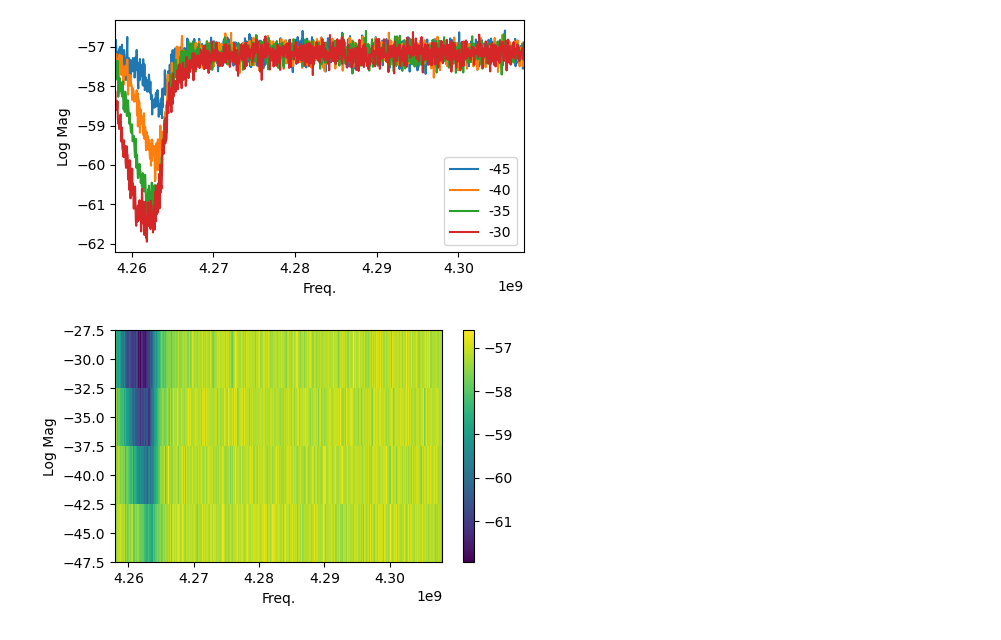

In [45]:
file = h5py.File(data_path + '00004_qubit_spec_power_sweep.h5' , 'r')

freq = np.array(file['freq'])[0]
log_mag = np.array(file['mags'])[0]
phase = np.array(file['phases'])[0]
read_power = np.array(file['read_power'])[0]
probe_power = np.array(file['probe_power'])[0]

fig = plt.figure()

ax = fig.add_subplot(221)
ax.set_ylabel('Log Mag')
ax.set_xlabel('Freq.')
for i in np.arange(len(probe_power)):
    ax.plot(freq[i], log_mag[i], label=probe_power[i])
ax.legend()

ax2 = fig.add_subplot(223, sharex=ax)
ax2.set_ylabel('Log Mag')
ax2.set_xlabel('Freq.')
ax2_plot = ax2.pcolormesh(freq[0], probe_power, log_mag)
fig.colorbar(ax2_plot)

fig.tight_layout()